# One: import `Pandas` and `sklearn`

In [472]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
roc_curve, auc, roc_auc_score, precision_score, recall_score , average_precision_score ,precision_recall_curve
from sklearn.utils.fixes import signature

# Two:  Dataset
### 2.1 looking in the Dataset
- `idID`: number
- ` diagnosis`: of breast tissues (M = malignant, B = benign)
- `radius_meanmean`: of distances from center to points on the perimeter
- `texture_meanstandard` deviation of gray-scale values
- `perimeter_meanmean`: size of the core tumor
- `area_mean`
- `smoothness_meanmean`: of local variation in radius lengths
- `compactness_meanmean`: of perimeter^2 / area - 1.0
- `concavity_meanmean`: of severity of concave portions of the contour
- `concave`: points_meanmean for number of concave portions of the contour
- `symmetry_mean`
- `fractal_dimension_meanmean`: for "coastline approximation" - 1
- `radius_sestandard`: error for the mean of distances from center to points on the perimeter
- `texture_sestandard` error for standard deviation of gray-scale values
- `perimeter_se`
- `area_se`
- `smoothness_sestandard`: error for local variation in radius lengths
- `compactness_sestandard`: error for perimeter^2 / area - 1.0
- `concavity_sestandard`: error for severity of concave portions of the contour
- `concave`: points_sestandard error for number of concave portions of the contour
- `symmetry_se`
- `fractal_dimension_sestandard`: error for "coastline approximation" - 1
- `radius_worst`:"worst" or largest mean value for mean of distances from center to points on the perimeter
- `texture_worst`:"worst" or largest mean value for standard deviation of gray-scale values
- `perimeter_worst`
- `area_worst`
- `smoothness_worst`: "worst" or largest mean value for local variation in radius lengths
- `compactness_worst`:"worst" or largest mean value for perimeter^2 / area - 1.0
- `concavity_worst`: "worst" or largest mean value for severity of concave portions of the contour
- `concave`: points_worst"worst" or largest mean value for number of concave portions of the contour
- `symmetry_worst`
- `fractal_dimension_worst`: "worst" or largest mean value for "coastline approximation" - 1

### 2.2 upload our dataset

In [473]:
df=pd.read_csv('Cancer_Detection.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2.3 See the names of the `columns`

In [474]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### 2.4 The shpe of the Dataset

In [475]:
df.shape

(569, 33)

### 2.5 Data type

In [476]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### 2.6 See how many `M `= malignant and `B `= benign

In [477]:
diag = df[['diagnosis','radius_mean']].groupby('diagnosis').count();diag

,radius_mean
diagnosis,
B,357
M,212


### 2.7 visualize how many M= malignant and B= benign

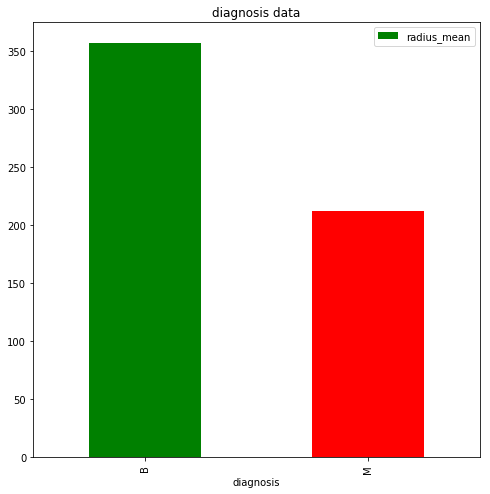

In [478]:
diag.plot(kind = 'bar',figsize = (8,8),color = 'gry',title = 'diagnosis data')
plt.show()

### 2.8 Look if there any missing value

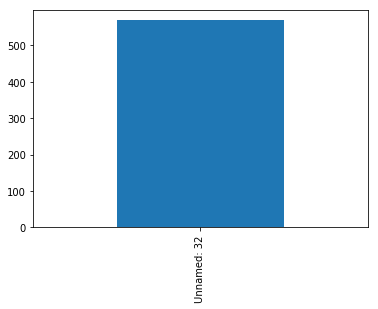

In [479]:
data = df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)
data.plot(kind="bar")
plt.show()

### 2.9 We found that the column `Unnamed: 32` is empty so we will drop it

In [480]:
df=df.drop("Unnamed: 32",axis=1)
df.shape

(569, 32)

- we see the columns number change 33 to 32

### 2.10 We look is there any `duplicate` row in our dataset

In [481]:
df[df.duplicated('id')]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


- We find that there is no `duplicate` row in our dataset

### 2.11 change the `diagnosis` value to `int64`

In [482]:
data={'M':1,'B':0}
df['diagnosis']=[data[i] for i in df.diagnosis.astype(str)]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [483]:
df['diagnosis'].dtype

dtype('int64')

- `diagnosis` type change form `Object` to `int`

### 2.12 Use `boxplot` to see the outliers in `radius_mean`

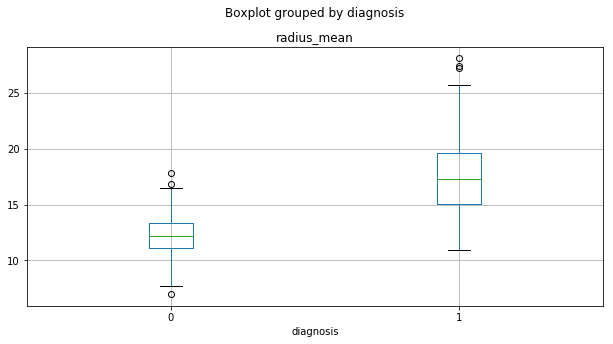

In [484]:
df.boxplot(column='radius_mean', by='diagnosis', figsize=(10,5))
plt.subplots_adjust(top=0.87);

### 2.13 Use `boxplot` to see the outliers in `area_mean`

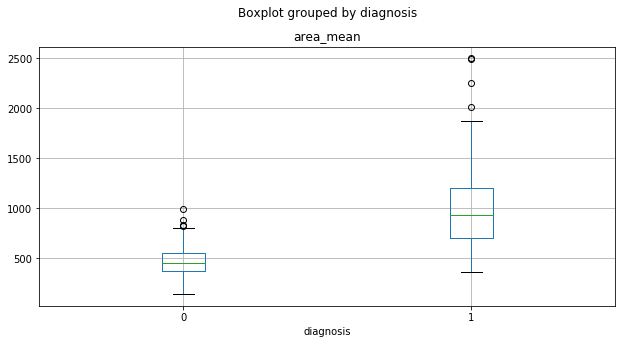

In [485]:
df.boxplot(column='area_mean', by='diagnosis', figsize=(10,5))
plt.subplots_adjust(top=0.87);

# Three: apply algorithms to our Dataset

### 3.1 split the data into `training` and `testing` set

In [486]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y = df['diagnosis']
X_train, X_test, y_train, y_test  = train_test_split(X,Y,random_state=42)

### 3.2 See the distribution of the training and testing sets

In [487]:
print('y_train class distribution')
print(y_train.value_counts(normalize=True))
print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
0    0.629108
1    0.370892
Name: diagnosis, dtype: float64
y_test class distribution
0    0.622378
1    0.377622
Name: diagnosis, dtype: float64


## 3.3 using Logistic Regression

### 3.3.1 initialize Logistic Regression and Fit it

In [488]:
lr = linear_model.LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction=lr.predict(X_test)
lr.score(X_test,y_test)

0.958041958041958

### 3.3.2 visualize the Logistic Regression

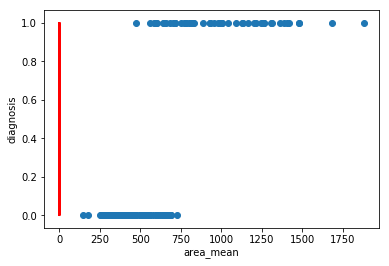

In [489]:
plt.scatter(X_test['area_mean'],y_test)
plt.plot(y_test,lr_prediction,color = 'r')
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.show()


### 3.3.3 visualize the `confusion matrix`

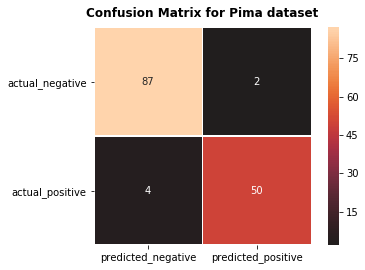

In [490]:
cm = np.array(confusion_matrix(y_test, lr_prediction))
cm_lr = pd.DataFrame(cm, index=['actual_negative', 'actual_positive'],
                             columns=['predicted_negative',
                                      'predicted_positive']); cm_lr
#Center: The value at which to center the colormap when plotting divergant data.
plt.title('Confusion Matrix for Pima dataset', fontweight='bold', y=1.02)
sns.heatmap(pd.DataFrame(cm_lr), annot=True, square=True, linewidth=0.5, fmt='', center=0)
plt.yticks(rotation=0);
plt.show()

- We see that there are '4' `FP` so we will use `threshold` to minimize the `FP` to `Zero`

### 3.3.4 Report the `y_test` 

In [491]:
print(classification_report(y_test, lr_prediction))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97        89
          1       0.96      0.93      0.94        54

avg / total       0.96      0.96      0.96       143



### 3.3.5 Useing `decision_function` and `roc_curve` to minimize the `FP` to `Zero`

In [492]:
lrY_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, lrY_score)
precision, recall, thresholds = precision_recall_curve(y_test, lrY_score)
fpr, tpr, thresh = roc_curve(y_test, lrY_score)
average_precision

0.9960900643989392

### 3.3.6 visualize the  `Precision-Recall curve`

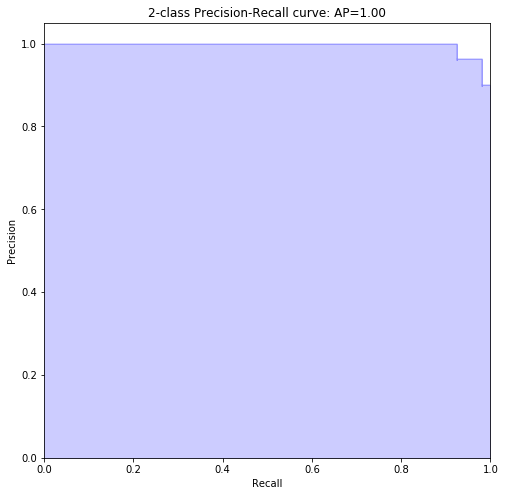

In [493]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

### 3.3.7 author visualize for `Recall`

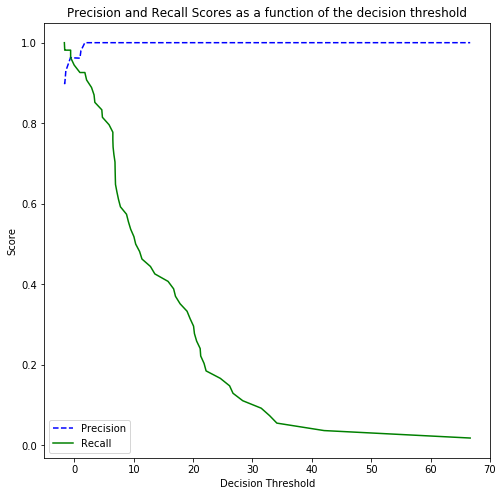

In [494]:
plt.figure(figsize=(8, 8))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.show()


### 3.3.8 Visualize for `ROC for positive diabetes tests`

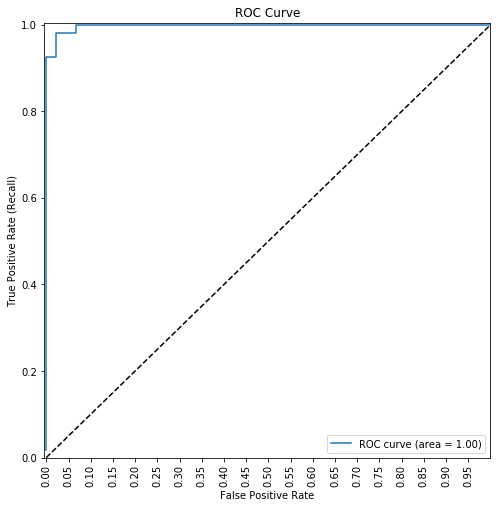

In [495]:
plt.figure(figsize=(8,8))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.005, 1, 0, 1.005])
plt.xticks(np.arange(0,1, 0.05), rotation=90)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc='best')
plt.show()

### 3.3.8 author visualize for `ROC for positive diabetes tests`

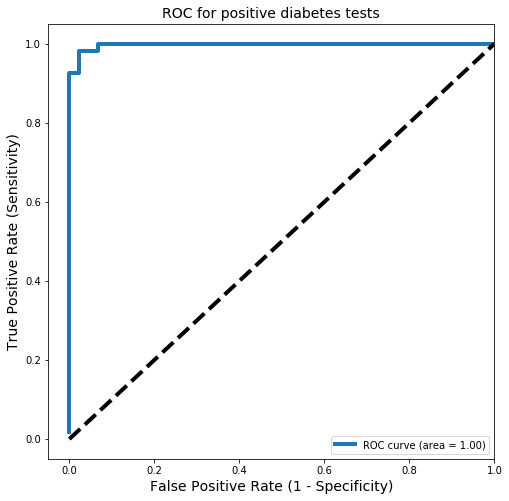

In [496]:
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('ROC for positive diabetes tests', fontsize=14)
plt.legend(loc="lower right")
plt.show()

### 3.3.9 Lower the threshold for predicting diabetes

In [497]:
lrY_pp = pd.DataFrame(lr.predict_proba(X_test), columns=['class_0','class_1'])
lrY_pp.head()

,class_0,class_1
0,8.095631e-01,0.190437
1,1.917893e-09,1.000000
2,1.537657e-03,0.998462
3,9.969078e-01,0.003092
4,9.991660e-01,0.000834


### 3.3.10 Create a new `column` of ones and `zeros` representing a change in the `threshold` for predicting class `1` 

In [498]:
lrY_pp['pred_threshold20'] = [1 if x >= 0.15 else 0 for x in lrY_pp.class_1.values]
lrY_pp.head()

,class_0,class_1,pred_threshold20
0,8.095631e-01,0.190437,1
1,1.917893e-09,1.000000,1
2,1.537657e-03,0.998462,1
3,9.969078e-01,0.003092,0
4,9.991660e-01,0.000834,0


### 3.3.11 Value counts from the `predicted` class

In [499]:
pd.Series(lr_prediction).value_counts()

0    91
1    52
dtype: int64

### 3.3.12 visualize the `confusion matrix` after apply `threshold`

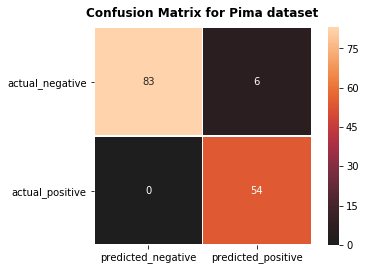

In [500]:
cm = np.array(confusion_matrix(y_test, lrY_pp.pred_threshold20))
cm_lr = pd.DataFrame(cm, index=['actual_negative', 'actual_positive'],
                             columns=['predicted_negative',
                                      'predicted_positive']); cm_lr
#Center: The value at which to center the colormap when plotting divergant data.
plt.title('Confusion Matrix for Pima dataset', fontweight='bold', y=1.02)
sns.heatmap(pd.DataFrame(cm_lr), annot=True, square=True, linewidth=0.5, fmt='', center=0)
plt.yticks(rotation=0);
plt.show()

## 3.4 using GaussianNB

### 3.4.1 initialize `GaussianNB` and Fit it

In [501]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_prediction = gnb.predict(X_test)
gnb.score(X_test,y_test)

0.958041958041958

### 3.4.2 visualize the `GaussianNB`

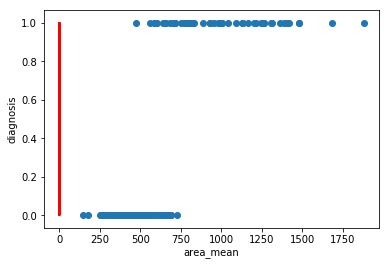

In [502]:
plt.scatter(X_test['area_mean'],y_test)
plt.plot(y_test,gnb_prediction,color = 'r')
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.show()

### 3.4.3 visualize the `confusion matrix`

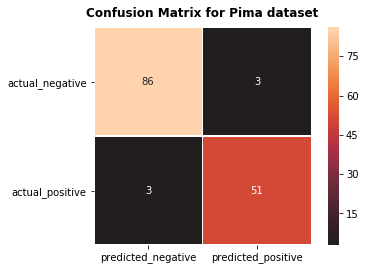

In [503]:
cm = np.array(confusion_matrix(y_test, gnb_prediction))
cm_lr = pd.DataFrame(cm, index=['actual_negative', 'actual_positive'],
                             columns=['predicted_negative',
                                      'predicted_positive']); cm_lr
#Center: The value at which to center the colormap when plotting divergant data.
plt.title('Confusion Matrix for Pima dataset', fontweight='bold', y=1.02)
sns.heatmap(pd.DataFrame(cm_lr), annot=True, square=True, linewidth=0.5, fmt='', center=0)
plt.yticks(rotation=0);
plt.show()

### 3.4.4 Lower the threshold for predicting diabetes

In [504]:
gnbY_pp = pd.DataFrame(lr.predict_proba(X_test), columns=['class_0','class_1'])
leY_pp.head()

,class_0,class_1,pred_threshold20
0,8.088754e-01,0.191125,1
1,2.055256e-09,1.000000,1
2,1.600977e-03,0.998399,1
3,9.969035e-01,0.003097,0
4,9.991581e-01,0.000842,0


### 3.4.5 Create a new column of ones and zeros representing a change in the threshold for predicting class 1¶

In [505]:
gnbY_pp['pred_threshold20'] = [1 if x >= 0.157 else 0 for x in gnbY_pp.class_1.values]
gnbY_pp.head()

,class_0,class_1,pred_threshold20
0,8.095631e-01,0.190437,1
1,1.917893e-09,1.000000,1
2,1.537657e-03,0.998462,1
3,9.969078e-01,0.003092,0
4,9.991660e-01,0.000834,0


### 3.4.6 visualize the `confusion matrix` after apply `threshold`

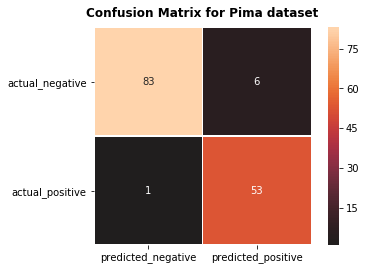

In [506]:
cm = np.array(confusion_matrix(y_test, gnbY_pp.pred_threshold20))
cm_lr = pd.DataFrame(cm, index=['actual_negative', 'actual_positive'],
                             columns=['predicted_negative',
                                      'predicted_positive']); cm_lr
#Center: The value at which to center the colormap when plotting divergant data.
plt.title('Confusion Matrix for Pima dataset', fontweight='bold', y=1.02)
sns.heatmap(pd.DataFrame(cm_lr), annot=True, square=True, linewidth=0.5, fmt='', center=0)
plt.yticks(rotation=0);
plt.show()